In [81]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

nx = 31
ny = 31
nt = 17
dx = 2/(nx-1)
dy =2/(ny-1)
sigma = 0.25
nu  = 0.05
dt = dx * dy * sigma / nu

x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

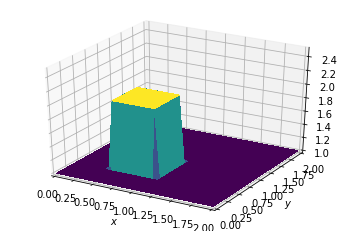

In [82]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [107]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    for n in range(nt+1):
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + (dt * nu / dx**2) * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2]) + (dt * nu /dy**2) * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1])
        u[:,0] = 1
        u[:,-1] = 1
        u[0,:] = 1
        u[-1,:] = 1
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
        

###Run through nt timesteps
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

diffuse(10)

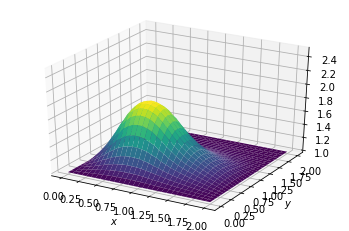

In [108]:
diffuse(10)

In [105]:
u[1:]

array([[1.        , 1.00293722, 1.00577403, 1.00882968, 1.01175811,
        1.0147987 , 1.01786646, 1.02045688, 1.02299644, 1.02475802,
        1.02626619, 1.02729573, 1.02800583, 1.02830527, 1.02830235,
        1.02767949, 1.02687858, 1.02565843, 1.0243032 , 1.02293794,
        1.02131071, 1.01975654, 1.01792302, 1.01606544, 1.01402033,
        1.0118884 , 1.00964343, 1.0073106 , 1.00491469, 1.00246766,
        1.        ],
       [1.        , 1.00641258, 1.01319053, 1.01968376, 1.02685145,
        1.03406442, 1.04090139, 1.04793037, 1.05301388, 1.05776608,
        1.06068665, 1.06296213, 1.06414636, 1.06465992, 1.06373259,
        1.06232616, 1.05938902, 1.05633254, 1.05284194, 1.04911199,
        1.0456942 , 1.04174892, 1.03799135, 1.03379012, 1.02950045,
        1.02495852, 1.02021478, 1.01533512, 1.01028612, 1.00517456,
        1.        ],
       [1.        , 1.01175189, 1.02322247, 1.03611255, 1.04897517,
        1.0626445 , 1.07701171, 1.08876452, 1.10049305, 1.10766089,
      

In [106]:
u[1:-1]

array([[1.        , 1.00293722, 1.00577403, 1.00882968, 1.01175811,
        1.0147987 , 1.01786646, 1.02045688, 1.02299644, 1.02475802,
        1.02626619, 1.02729573, 1.02800583, 1.02830527, 1.02830235,
        1.02767949, 1.02687858, 1.02565843, 1.0243032 , 1.02293794,
        1.02131071, 1.01975654, 1.01792302, 1.01606544, 1.01402033,
        1.0118884 , 1.00964343, 1.0073106 , 1.00491469, 1.00246766,
        1.        ],
       [1.        , 1.00641258, 1.01319053, 1.01968376, 1.02685145,
        1.03406442, 1.04090139, 1.04793037, 1.05301388, 1.05776608,
        1.06068665, 1.06296213, 1.06414636, 1.06465992, 1.06373259,
        1.06232616, 1.05938902, 1.05633254, 1.05284194, 1.04911199,
        1.0456942 , 1.04174892, 1.03799135, 1.03379012, 1.02950045,
        1.02495852, 1.02021478, 1.01533512, 1.01028612, 1.00517456,
        1.        ],
       [1.        , 1.01175189, 1.02322247, 1.03611255, 1.04897517,
        1.0626445 , 1.07701171, 1.08876452, 1.10049305, 1.10766089,
      